<a href="https://colab.research.google.com/github/shambhavii13/LaneDetection/blob/main/lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

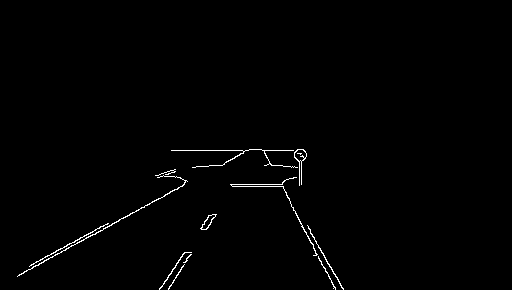

[[ 17 276 184 184]]
-0.5508982035928149
[[ 36 261 108 223]]
-0.5277777777777769
[[286 195 335 288]]
[[310 233 342 288]]
[[168 289 183 265]]
[ -1.6 557.8]
-1.6000000000000076
[[175 265 184 252]]
[ -1.44444444 517.77777778]
-1.4444444444444289
[[163 283 171 273]]
[ -1.25 486.75]
-1.2499999999999885


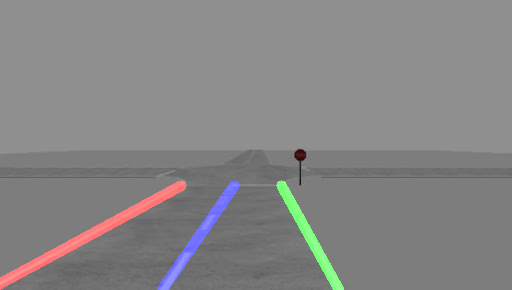

-1

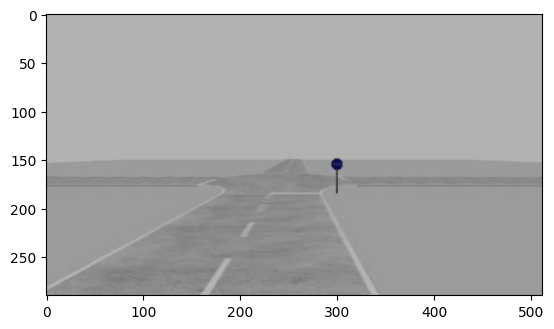

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = r"hi.jpg"
image1 = cv2.imread(img_path)
plt.imshow(image1)

#converting image to grayscale
def grey(image):
    image = np.asarray(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Apply Gaussian Blur to smoothen image
def gauss(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

#Canny edge detection
def canny(image):
    edges = cv2.Canny(image,50,150)
    return edges

#isolating region with lane lines by creating a triangular mask
def region(image):
    height, width = image.shape
    triangle = np.array([[(0, height), (250, 85.5), (width, height)]], dtype=np.int32)
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask,triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

#doing the same with a smaller region for the middle line
def region2(image):
    height, width = image.shape
    triangle = np.array([ [(120, height), (180, 180), (250, height)]])
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

#displaying leftand right lanes
def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
            x1, y1, x2, y2 = lines[0]
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), 10)#leftlane in red
            x1, y1, x2, y2 = lines[1]
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 10)#rightlane in green
    return lines_image

#displaying central lane
def display_lines2(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
            x1, y1, x2, y2 = lines[0]
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10) #centre line in blue
    return lines_image

def average(image, lines):
    left = []
    right = []

    if lines is not None:
      for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        #returns slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
            print(slope)
        else:
            right.append((slope, y_int))
    #takes average among all the columns (column0: slope, column1: y_int)
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)

    #create lines based on averages calculates
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)

    return np.array([left_line, right_line])

#same for central line
def average2(image, lines):
    centre = []
    if lines is not None:
      for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)
        slope = parameters[0]
        y_int = parameters[1]

        if slope < 0:
            centre.append((slope, y_int))
            print(slope)
        else:
            print(slope)
    centre_avg = np.average(centre, axis=0)
    centre_line = make_points(image, centre_avg)
    return np.array([centre_line])

def make_points(image, average):
    try: slope, y_int = average
    except TypeError:slope, y_int = 0.001,0

    y1 = image.shape[0]
    y2 = int(y1 * (0.64))
    x1 = int((y1 - y_int) / slope)
    x2 = int((y2 - y_int) /slope)
    return np.array([x1, y1, x2, y2])

from google.colab.patches import cv2_imshow


#detecting laness in imagee
copy = np.copy(image1)
edges = cv2.Canny(copy,50,150)
isolated = region(edges)
isolated2 = region2(edges)#for centre line
cv2_imshow(isolated)
cv2.waitKey(0)


#drawing lines
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=50, maxLineGap=5)#right and left lines
lines2 = cv2.HoughLinesP(isolated2, 2, np.pi/180, 10, np.array([]), minLineLength=6, maxLineGap=0)#centre line
averaged_lines = average(copy, lines)
averaged_lines2 = average2(copy, lines2)
black_lines = display_lines(copy, averaged_lines)
black_lines2 = display_lines2(copy, averaged_lines2)
lanes = cv2.addWeighted(copy, 0.8, black_lines+black_lines2, 1, 1)

cv2_imshow(lanes)
cv2.waitKey(0)
